
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)



# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Deep Learning. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

__*GridSearch:*__ CodeGrade will likely break if it is asked to run a gridsearch for a deep learning model (CodeGrade instances run on a single processor). So while you may choose to run a gridsearch locally to find the optimum hyper-parameter values for your model, please delete (or comment out) the gridsearch code and simply instantiate a model with the optimum parameter values to get the performance that you want out of your model prior to submission. 


## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

____

# (CodeGrade) Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) If you have gridsearch code, now is when you either delete it or comment out that code so CodeGrade doesn't run it and crash. 

4) Read the directions in **Part 2** of this notebook for specific instructions on how to prep that section for CodeGrade.

____

<a id="p1"></a>
## Part 1 - LSTMs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Name your model as `model`
- Use a `single hidden layer`
- Use `sparse_categorical_crossentropy` as your loss function
- Use `accuracy` as your metric
- Report your overall score and accuracy
- Due to resource concerns on CodeGrade, `set your model's epochs=1`

For reference, the LSTM code we used in class will be useful. 

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done! 

In [82]:
# Import data (don't alter the code in this cell)
from tensorflow.keras.datasets import reuters

# Suppress some warnings from deprecated reuters.load_data
import warnings
warnings.filterwarnings('ignore')

# Load data
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# Due to limited computational resources on CodeGrade, take the following subsample 
train_size = 1000
X_train = X_train[:train_size]
y_train = y_train[:train_size]

In [83]:
# Demo of encoding
word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [84]:
# Imports (don't alter this code)
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

# DO NOT CHANGE THESE VALUES 
# Keras docs say that the + 1 is needed: https://keras.io/api/layers/core_layers/embedding/
MAX_FEATURES = len(word_index.values()) + 1

# maxlen is the length of each sequence (i.e. document length)
MAXLEN = 200

In [85]:
# see how x_train looks like first
X_train.shape

(1000,)

In [86]:
# Pre-process your data by creating sequences 
# Save your transformed data to the same variable name:
# example: X_train = some_transformation(X_train)

# YOUR CODE HERE
# Pre-Processing the train and test data using pad_sequences from sequence
# pad_sequences convert the 1D array into a numpy 2D array
X_train = sequence.pad_sequences(X_train, maxlen=MAXLEN)
X_test = sequence.pad_sequences(X_test, maxlen=MAXLEN)


In [87]:
# Check out the X_train shape after transformation
X_train.shape

(1000, 200)

In [88]:
# Visible tests
assert X_train.shape[1] == MAXLEN, "Your train input sequences are the wrong length. Did you use the sequence import?"
assert X_test.shape[1] == MAXLEN, "Your test input sequences are the wrong length. Did you use the sequence import?"

### Create your model

Make sure to follow these instructions (also listed above):
- Name your model as `model`
- Use a `single hidden layer`
- Use `sparse_categorical_crossentropy` as your loss function
- Use `accuracy` as your metric

**Additional considerations**

The number of nodes in your output layer should be equal to the number of **unique** values in the sequences you are training and testing on. For this text, that value is equal to 46.

- Set the number of nodes in your output layer equal to 46

In [89]:
# Build and compile your model here

# YOUR CODE HERE
# raise NotImplementedError()
# Building a 1 hidden layer LSTM language model
# Instantiate the Sequential
model = Sequential()

# Make the first layer to be an Embedding layer
model.add(Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=MAXLEN))
# Add Hidden layer
model.add(LSTM(units=128))
# Add an output layer
model.add(Dense(units=46, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# see the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 128)          3965440   
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 46)                5934      
Total params: 4,102,958
Trainable params: 4,102,958
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Visible Test
assert model.get_config()["layers"][1]["class_name"] == "Embedding", "Layer 1 should be an Embedding layer."

In [91]:
# Hidden Test

### Fit your model

Now, fit the model that you built and compiled in the previous cells. Remember to set your `epochs=1`! 

In [92]:
# Fit your model here
# REMEMBER to set epochs=1

# YOUR CODE HERE
# raise NotImplementedError()

# Fitting the model declared above
model.fit(X_train, y_train,
          epochs=1,
          validation_data=(X_test, y_test))

32/32 [==============================] - 8s 216ms/step - loss: 2.9698 - accuracy: 0.2980 - val_loss: 2.4129 - val_accuracy: 0.3664

In [93]:
# Visible Test 
n_epochs = len(model.history.history["loss"])
assert n_epochs == 1, "Verify that you set epochs to 1."

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Answer:---------->
Pad Sequence method converts the 1D Array of the X_train data into a 2D Array. It is a part of data preparation in order to make the data usable for the LSTM model.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Answer:---------->
Recurrent Neural Network (RNN) is able to pass on the learnt state to the neuron and refine the model however it does not remember the previous state of the data and it starts fresh. When working with series data like (text, time series data or anything that has a sequence to it) the Long- Short Term Memory Cell units retain some information that it has learnt so far while fitting a model. This way the model is able to retain key information from the previous state and is able to forget not so important information. Therefore improving the model accuracy and performance.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Answer:---------->
RNN can be used wherever the data is sequential for example:-
1. Time Series Data (like financial data or weather event)
2. Generating Text or in case of Chatbots
3. Processing Text for classification etc.
RNN suffers from the diminishing gradient descent problem and that is where the LSTM comes in.

LSTM are better when the data is sequential where the upcoming data is related to the previous dataset that the model has seen
LSTM are useful for:-
1. Time Series Data (like financial data or weather event)
2. Generating Text or in case of Chatbots
3. Processing Text for classification etc.


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it.

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

### Reading in the images

The code in the following cell will download the images to your notebook (either in your local Jupyter notebook or in Google colab).

In [94]:
# Prep to import images (don't alter the code in this cell)
import urllib.request

# Text file of image URLs
text_file = "https://raw.githubusercontent.com/LambdaSchool/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_image_url.txt"
data = urllib.request.urlopen(text_file)

# Create list of image URLs
url_list = [] 
for line in data:
    url_list.append(line.decode('utf-8'))

In [95]:
# Import images (don't alter the code in this cell)

from skimage.io import imread
from skimage.transform import resize 

# instantiate list to hold images
image_list = []

### UNCOMMENT THE FOLLOWING CODE TO LOAD YOUR IMAGES

#loop through URLs and load each image
for url in url_list:
    image_list.append(imread(url))

## UNCOMMENT THE FOLLOWING CODE TO VIEW AN EXAMPLE IMAGE SIZE
# What is an "image"?
print(type(image_list[0]), end="\n\n")

print("Each of the Images is a Different Size")
print(image_list[0].shape)
print(image_list[1].shape)

<class 'numpy.ndarray'>

Each of the Images is a Different Size
(2137, 1710, 3)
(3810, 2856, 3)


### Run ResNet50v2

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. You can print out or view the predictions in any way you see fit. In order to receive credit, you need to have made predictions at some point in the following cells.

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

**Autograded tasks**

* Instantiate your ResNet 50v2 and save to a variable named `resnet_model`

**Other tasks**
* Re-size your images
* Use `resnet_model` to predict if each image contains a frog
* Decode your predictions
* Hint: the lesson on CNNs will have some helpful code

**Stretch goals***
* Check for other things such as fish
* Print out the image with its predicted label
* Wrap everything nicely in well documented functions

## Important note!

To increase the chances that your notebook will run in CodeGrade, when you **submit** your notebook:

* comment out the code where you load the images
* comment out the code where you make the predictions
* comment out any plots or image displays you create

**MAKE SURE YOUR NOTEBOOK RUNS COMPLETELY BEFORE YOU SUBMIT!**

In [96]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import requests
from skimage import io

from tensorflow.keras.applications.resnet_v2 import ResNet50V2 # <-- pre-trained model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions

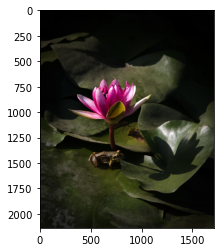

Results for image 0 

[('n03729826', 'matchstick', 0.036261007), ('n06359193', 'web_site', 0.03067089), ('n01930112', 'nematode', 0.029264303)]


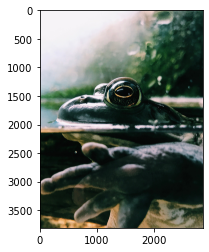

Results for image 1 

[('n02009912', 'American_egret', 0.026128756), ('n06359193', 'web_site', 0.025837809), ('n03028079', 'church', 0.0212458)]


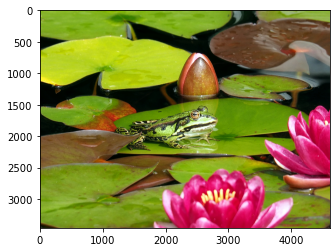

Results for image 2 

[('n03729826', 'matchstick', 0.042362113), ('n01930112', 'nematode', 0.028562443), ('n06359193', 'web_site', 0.027457127)]


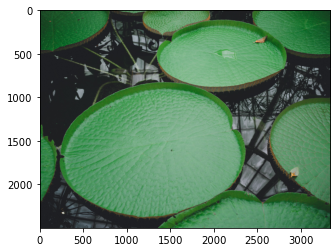

Results for image 3 

[('n03729826', 'matchstick', 0.046424292), ('n06359193', 'web_site', 0.038704515), ('n01930112', 'nematode', 0.032947753)]


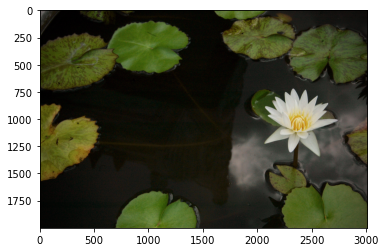

Results for image 4 

[('n03729826', 'matchstick', 0.034879435), ('n06359193', 'web_site', 0.032569613), ('n01930112', 'nematode', 0.02444157)]


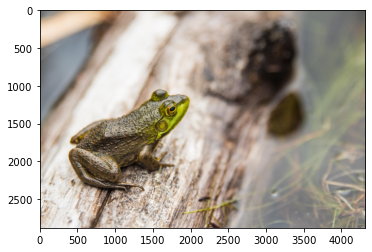

Results for image 5 

[('n03729826', 'matchstick', 0.040673237), ('n06359193', 'web_site', 0.029944524), ('n01930112', 'nematode', 0.027339753)]


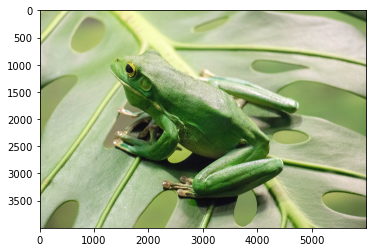

Results for image 6 

[('n03729826', 'matchstick', 0.06706024), ('n06359193', 'web_site', 0.0319051), ('n01739381', 'vine_snake', 0.024304071)]


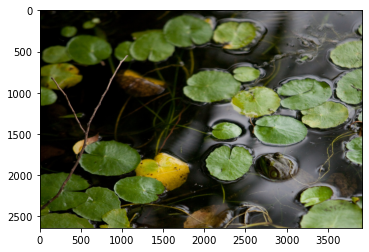

Results for image 7 

[('n03729826', 'matchstick', 0.037795022), ('n01930112', 'nematode', 0.0317989), ('n06359193', 'web_site', 0.019666152)]


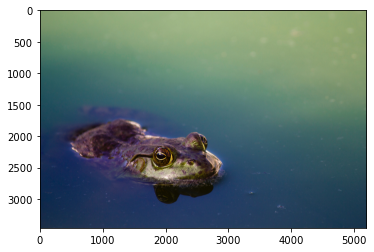

Results for image 8 

[('n06359193', 'web_site', 0.054758765), ('n03729826', 'matchstick', 0.047280382), ('n01930112', 'nematode', 0.034785718)]


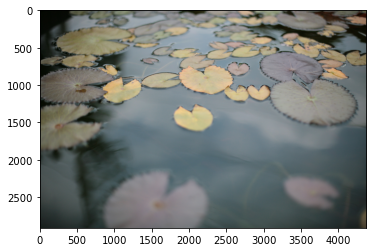

Results for image 9 

[('n03729826', 'matchstick', 0.046089794), ('n06359193', 'web_site', 0.038412888), ('n01930112', 'nematode', 0.03460018)]


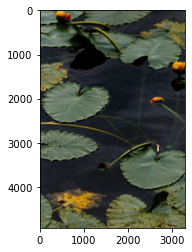

Results for image 10 

[('n03729826', 'matchstick', 0.041862134), ('n06359193', 'web_site', 0.03290268), ('n01930112', 'nematode', 0.030901311)]


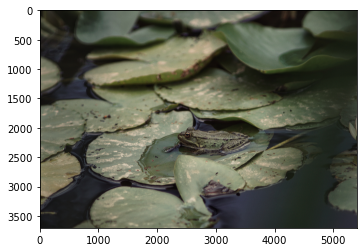

Results for image 11 

[('n03729826', 'matchstick', 0.037420377), ('n01930112', 'nematode', 0.03353805), ('n06359193', 'web_site', 0.029291421)]


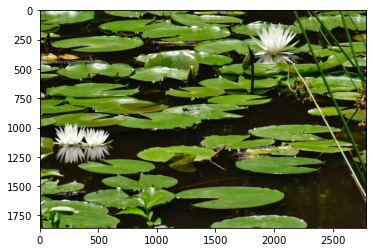

Results for image 12 

[('n03729826', 'matchstick', 0.020268466), ('n01930112', 'nematode', 0.015525078), ('n06359193', 'web_site', 0.011792696)]


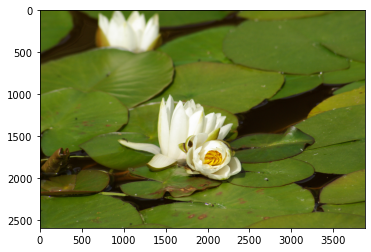

Results for image 13 

[('n03729826', 'matchstick', 0.046753816), ('n06359193', 'web_site', 0.028480344), ('n01739381', 'vine_snake', 0.022407662)]


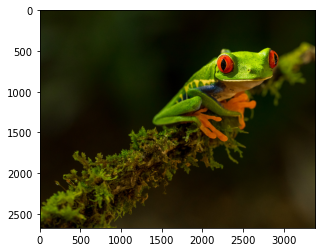

Results for image 14 

[('n03729826', 'matchstick', 0.063401096), ('n06359193', 'web_site', 0.03900742), ('n01930112', 'nematode', 0.02864687)]


In [97]:
from IPython.display import Image
# Code from the CNN lecture might come in handy here!
# Import the pre-trained model directly

# Instantiate the model
resnet_model = ResNet50V2(weights='imagenet')

def process_img(img):
    """
    Uses tensorflow pre-build image processor.

    Returns processed image.

    :param img_path: image in an ndarray
    :return: processed image to be used for the model
    """
    return resize(img, output_shape=(224, 224))
    # return image.load_img(img_path, target_size=(244, 244))

def img_contains_frog(img):
    """
    Takes the image as an input and determines if the image contains frog

    :param img: image
    :return: returns the probability if the frog is present in the image
    """
    # pre process image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Get classification of image
    features = resnet_model.predict(x)

    # get the results
    results = decode_predictions(features, top=3)[0]
    print(results)

    for entry in results:
        # if (entry[1] == 'bullfrog') or (entry[1] == 'tree frog') or (entry[1] == 'tailed frog'):
        if (entry[1] == 'bullfrog') or (entry[1] == 'tree frog') or (entry[1] == 'tailed frog'):
            return entry[2]
        return 0.0

for _id, img in enumerate(url_list):
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

# Show image and results to know what each is
for i in range(len(image_list)):
    # Read image and display sequentially
    display_image = io.imread(url_list[i])
    plt.imshow(display_image)
    plt.show()
    print(f'Results for image {i} \n')
    # Process image
    processed_image = process_img(image_list[i])
    # Classify
    img_contains_frog(processed_image)

In [103]:
# Checking for fish in the images using VGG19
# Uncomment to see
# Instantiate the model
"""
from tensorflow.keras.applications import VGG19
VGG19_model = VGG19(weights='imagenet')

def img_contains_fish(img):
"""
    # Takes the image as an input and determines if the image contains frog

    # :param img: image
    # :return: returns the probability if the frog is present in the image
"""
    # pre process image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Get classification of image
    features = VGG19_model.predict(x)

    # get the results
    results = decode_predictions(features, top=3)[0]
    print(results)

    for entry in results:
        # if (entry[1] == 'bullfrog') or (entry[1] == 'tree frog') or (entry[1] == 'tailed frog'):
        if (entry[1] == 'fish'):
            return entry[2]
        return 0.0

for _id, img in enumerate(url_list):
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

# Show image and results to know what each is
for i in range(len(image_list)):
    # Read image and display sequentially
    display_image = io.imread(url_list[i])
    plt.imshow(display_image)
    plt.show()
    print(f'Results for image {i} \n')
    # Process image
    processed_image = process_img(image_list[i])
    # Classify
    img_contains_fish(processed_image)
"""

"\n    # pre process image\n    x = image.img_to_array(img)\n    x = np.expand_dims(x, axis=0)\n    x = preprocess_input(x)\n\n    # Get classification of image\n    features = VGG19_model.predict(x)\n\n    # get the results\n    results = decode_predictions(features, top=3)[0]\n    print(results)\n\n    for entry in results:\n        # if (entry[1] == 'bullfrog') or (entry[1] == 'tree frog') or (entry[1] == 'tailed frog'):\n        if (entry[1] == 'fish'):\n            return entry[2]\n        return 0.0\n\nfor _id, img in enumerate(url_list):\n    r = requests.get(img)\n    with open(f'example{_id}.jpg', 'wb') as f:\n        f.write(r.content)\n\n# Show image and results to know what each is\nfor i in range(len(image_list)):\n    # Read image and display sequentially\n    display_image = io.imread(url_list[i])\n    plt.imshow(display_image)\n    plt.show()\n    print(f'Results for image {i} \n')\n    # Process image\n    processed_image = process_img(image_list[i])\n    # Classify\n 

In [ ]:
# Visible test
assert resnet_model.get_config()["name"] == "resnet50v2", "Did you instantiate the resnet model?"

<a id="p3"></a>
## Part 3 - Autoencoders

**Describe a use case for an autoencoder given that an autoencoder tries to predict its own input.**

Answer:---------->
The autoencoders are unsupervised learning models.
The autoencoders can be used in a case where models are trained on how a normal type of data looks like (for example detecting defective parts or detecting cancer etc.). Therefore whenever an image from a defective or cancer like data is provided the model will show high error which may attribute to something wrong in the passed data. In other words by training the data on a normal kind of data we are trying to ascertain the non normal data.

<a id="p4"></a>
## Part 4 - More...

**Answer the following questions, with a target audience of a fellow Data Scientist:**

- What do you consider your strongest area as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?

A few sentences per answer is fine - only elaborate if time allows.

Answer:---------->
1. I excel in understanding the complexities of various model building and I can easily understand the maths underlying the equations.
2. I want to learn more about how to build better models and understand better of how they work. I want to specifically apply my skills to computer vision.
3. Data Science in five years will be even more stronger with more companies trying to leverage the technology to make better predictions and use it for their benefit.

## Congratulations! 

Thank you for your hard work, and [congratulations](https://giphy.com/embed/26xivLqkv86uJzqWk)!!! You've learned a lot, and you should proudly call yourself a Data Scientist.
